**Name: Aakash Thatte           
Roll number: 12041590**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import os
import random
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import imageio
import pickle

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/test_images_paths.csv")

In [ ]:
test.drop("Unnamed: 0",axis=1,inplace=True)
test

,image,label,id
0,Apple Braeburn/3_100.jpg,apple_braeburn,apple_braeburn_3_100.jpg
1,Apple Braeburn/32_100.jpg,apple_braeburn,apple_braeburn_32_100.jpg
2,Apple Braeburn/321_100.jpg,apple_braeburn,apple_braeburn_321_100.jpg
3,Apple Braeburn/322_100.jpg,apple_braeburn,apple_braeburn_322_100.jpg
4,Apple Braeburn/323_100.jpg,apple_braeburn,apple_braeburn_323_100.jpg
...,...,...,...
22683,Watermelon/r_95_100.jpg,watermelon,watermelon_r_95_100.jpg
22684,Watermelon/r_96_100.jpg,watermelon,watermelon_r_96_100.jpg
22685,Watermelon/r_97_100.jpg,watermelon,watermelon_r_97_100.jpg
22686,Watermelon/r_98_100.jpg,watermelon,watermelon_r_98_100.jpg


In [ ]:
fruit_class_testing_folder = "/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Test/"
fruit_class_training_folder = "/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/"
all_fruit_classes = os.listdir(fruit_class_testing_folder)

def process_name(name):
  name = name.lower()
  names = name.split()
  return ("_").join(names)

In [ ]:
len(all_fruit_classes)

131

In [ ]:
with open("/content/drive/MyDrive/Semester4/DS250/class_rgb_average.pkl","rb") as f:
    clavg = pickle.load(f)

In [ ]:
def give_r_g_b_average(image):
  return (image[:,:,0].sum()/10000,image[:,:,1].sum()/10000,image[:,:,2].sum()/10000)

In [ ]:
import scipy
cospredictions = []
cosdistances = []
euclid = []
eupre = []
test_images = test['image']
for e,i in enumerate(test_images):
  path = fruit_class_testing_folder+"/"+i
  image = imread(path)
  r_,g_ ,b_ = give_r_g_b_average(image)
  avg = np.array([r_,g_,b_])
  dcos = np.Inf
  deucl = np.Inf
  clscos = None
  clseucl = None
  for cl in clavg:
    dstcos = scipy.spatial.distance.cosine(avg,clavg[cl])
    dsteucl = np.linalg.norm(avg-clavg[cl])
    if dstcos<dcos:
      dcos = dstcos
      clscos = cl
    if dsteucl< deucl:
      deucl = dsteucl
      clseucl = cl
  cospredictions.append(clscos)
  cosdistances.append(dcos)
  euclid.append(dsteucl)
  eupre.append(clseucl)
  if (e+1)%1000==0:
    print(i)

Apple Pink Lady/265_100.jpg
Apple Red Yellow 2/r_225_100.jpg
Banana/321_100.jpg
Carambula/r_195_100.jpg
Cherry Wax Black/225_100.jpg
Corn Husk/98_100.jpg
Fig/r2_110_100.jpg
Grape White 3/125_100.jpg
Hazelnut/205_100.jpg
Lemon Meyer/324_100.jpg
Mango/r_210_100.jpg
Nectarine/r_3_100.jpg
Orange/93_100.jpg
Pear 2/15_100.jpg
Pear Red/r_133_100.jpg
Pepper Orange/104_100.jpg
Physalis/r_43_100.jpg
Plum/89_100.jpg
Potato White/r2_77_100.jpg
Strawberry Wedge/r2_101_100.jpg
Tomato 2/r2_182_100.jpg
Tomato not Ripened/174_100.jpg


In [ ]:
len(cospredictions)

22688

In [ ]:
len(test_images)

22688

In [ ]:
test['cosine_predictions'] = cospredictions
test['cosine_dist'] = cosdistances
test['euclidean_predictions'] = eupre
test['euclidean_dist'] = euclid

In [ ]:
len(test[test['label']==test['cosine_predictions']])

7958

In [ ]:
# Accuracy is 35 percent with cosine distance
7958/22688

0.3507581100141044

In [ ]:
len(test[test['label']==test['euclidean_predictions']])

7622

In [ ]:
# Accuracy is 33 percent with euclidean distance
7622/22688

0.33594851904090267

In [ ]:
test

,image,label,id,predictions,cosine
0,Apple Braeburn/3_100.jpg,apple_braeburn,apple_braeburn_3_100.jpg,apple_braeburn,0.000070
1,Apple Braeburn/32_100.jpg,apple_braeburn,apple_braeburn_32_100.jpg,apple_crimson_snow,0.000164
2,Apple Braeburn/321_100.jpg,apple_braeburn,apple_braeburn_321_100.jpg,kaki,0.000048
3,Apple Braeburn/322_100.jpg,apple_braeburn,apple_braeburn_322_100.jpg,kaki,0.000050
4,Apple Braeburn/323_100.jpg,apple_braeburn,apple_braeburn_323_100.jpg,kaki,0.000041
...,...,...,...,...,...
22683,Watermelon/r_95_100.jpg,watermelon,watermelon_r_95_100.jpg,watermelon,0.000055
22684,Watermelon/r_96_100.jpg,watermelon,watermelon_r_96_100.jpg,watermelon,0.000043
22685,Watermelon/r_97_100.jpg,watermelon,watermelon_r_97_100.jpg,watermelon,0.000052
22686,Watermelon/r_98_100.jpg,watermelon,watermelon_r_98_100.jpg,watermelon,0.000058


In [ ]:
test[test['label']!=test['cosine_predictions']].iloc[0]
# Now we can see that the image Apple Braeburn/32_100.jpg
# was predicted by our model as Apple Crimson Snow

image                    Apple Braeburn/32_100.jpg
label                               apple_braeburn
id                       apple_braeburn_32_100.jpg
cosine_predictions              apple_crimson_snow
cosine_dist                               0.000164
euclidean_predictions           apple_crimson_snow
euclidean_dist                           81.675307
Name: 1, dtype: object

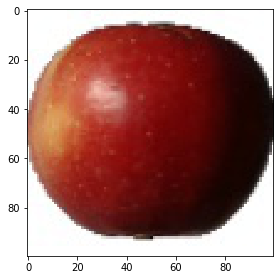

In [ ]:
imshow(fruit_class_testing_folder+"Apple Braeburn/32_100.jpg")

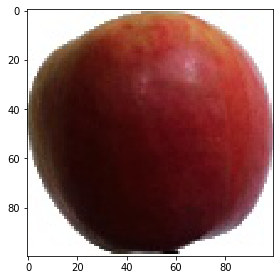

In [ ]:
imshow(fruit_class_training_folder+"Apple Crimson Snow/0_100.jpg")